In [3]:
import wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
plt.rc('figure', figsize=(10, 7))
plt.style.use('fivethirtyeight')

In [5]:
# show 100 columns
pd.set_option('display.max_columns', 100)

In [7]:
df = wrangle.get_superstore_data()
df

Let me get that for you...


,Unnamed: 0,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,1729,4,OFF-BI-10002824,BN-11515,9,CA-2016-169943,2016-05-19,2016-05-24,Standard Class,Consumer,United States,New York City,New York,10011.0,47.7440,4.0,0.20,14.9200,Office Supplies,Binders,Bradley Nguyen,Recycled Easel Ring Binders,East
1730,1730,4,OFF-AP-10000828,JK-15370,10,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,Philadelphia,Pennsylvania,19143.0,434.3520,3.0,0.20,43.4352,Office Supplies,Appliances,Jay Kimmel,Avanti 4.4 Cu. Ft. Refrigerator,East
1731,1731,4,OFF-AP-10002906,JK-15370,10,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,Philadelphia,Pennsylvania,19143.0,3.5520,2.0,0.20,0.4440,Office Supplies,Appliances,Jay Kimmel,Hoover Replacement Belt for Commercial Guardsm...,East
1732,1732,4,OFF-AP-10003860,JK-15370,10,CA-2015-127453,2015-12-19,2015-12-20,First Class,Consumer,United States,Philadelphia,Pennsylvania,19143.0,88.8320,4.0,0.20,7.7728,Office Supplies,Appliances,Jay Kimmel,Fellowes Advanced 8 Outlet Surge Suppressor wi...,East


In [8]:
# # set order date to datetime
# df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
# # set order date as the index
# df.set_index('Order Date', inplace=True)

In [10]:
df = wrangle.prep_superstore_data(df)

In [132]:
# group by region and determine the sales
df_regions = df.groupby('region_name')
# only look at profit column
df_regions['profit'].mean()


region_name
Central     1.242639
East       18.872376
South      34.603028
West       33.978837
Name: profit, dtype: float64

Central region has negative profit with the highest discount rate.

Customers in the central region has the highest amount of sales but negative profit.

In [12]:
# number of customers per region
train_region_customers = df.groupby('region_name')['customer_name'].nunique()
train_region_customers

region_name
Central    175
East       219
South      114
West       231
Name: customer_name, dtype: int64

In [13]:
# set train index decending
df.sort_index(ascending=True, inplace=True)
df

,order_id,ship_date,ship_mode,segment,city,state,postal_code,sales,quantity,discount,profit,category,sub-category,customer_name,product_name,region_name,avg_item_sales,original_sales,discount_percent
order_date,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,11.784,3.0,0.2,4.2717,Office Supplies,Labels,Phillina Ober,Avery 508,Central,3.928,11.984,1.668892
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,272.736,3.0,0.2,-64.7748,Office Supplies,Storage,Phillina Ober,SAFCO Boltless Steel Shelving,Central,90.912,272.936,0.073277
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,Home Office,Naperville,Illinois,60540.0,3.540,2.0,0.8,-5.4870,Office Supplies,Binders,Phillina Ober,GBC Standard Plastic Binding Systems Combs,Central,1.770,4.340,18.433180
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,31.200,3.0,0.2,9.7500,Technology,Accessories,Melanie Seite,Memorex Micro Travel Drive 8 GB,Central,10.400,31.400,0.636943
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,Consumer,Laredo,Texas,78041.0,9.344,2.0,0.2,1.1680,Office Supplies,Art,Melanie Seite,Newell 312,Central,4.672,9.544,2.095557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,CA-2017-126221,2018-01-05,Standard Class,Home Office,Columbus,Indiana,47201.0,209.300,2.0,0.0,56.5110,Office Supplies,Appliances,Chuck Clark,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Central,104.650,209.300,0.000000
2017-12-30,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,52.776,3.0,0.2,19.7910,Office Supplies,Binders,Patrick O'Donnell,Wilson Jones Legal Size Ring Binders,East,17.592,52.976,0.377529
2017-12-30,CA-2017-143259,2018-01-03,Standard Class,Consumer,New York City,New York,10009.0,90.930,7.0,0.0,2.7279,Technology,Phones,Patrick O'Donnell,Gear Head AU3700S Headset,East,12.990,90.930,0.000000


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(-5.0, 0, 'Texas'),
  Text(0.0, 0, 'Alabama'),
  Text(5.0, 0, 'Connecticut'),
  Text(10.0, 0, 'Illinois'),
  Text(15.0, 0, 'Maryland'),
  Text(20.0, 0, 'Missouri'),
  Text(25.0, 0, 'New Jersey'),
  Text(30.0, 0, 'Oklahoma'),
  Text(35.0, 0, 'Tennessee'),
  Text(40.0, 0, 'Wisconsin'),
  Text(45.0, 0, '')])

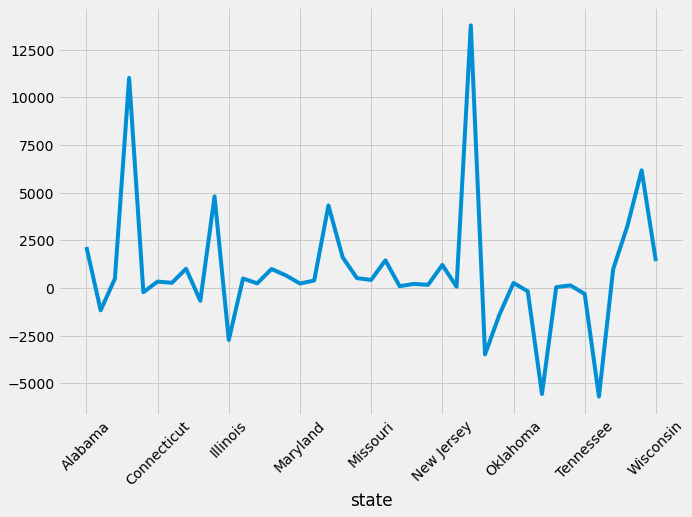

In [14]:
df.groupby('state').sum()['profit'].plot()
# plot with seaborn
# rotate x-axis labels
plt.xticks(rotation=45)

In [16]:
# sum of profit by region
df.groupby('region_name').sum()
# total profit
df.groupby('region_name').sum()['profit']
# add all profits
# total_profit = df.groupby('region_name').sum()['profit'].sum()

region_name
Central      483.3867
East       10493.0409
South       8581.5510
West       18382.5507
Name: profit, dtype: float64

In [17]:
regional_sums = df.groupby('region_name').sum()['profit']

# select only the central region
central_profit_sum = regional_sums.loc['Central']
east_profit_sum = regional_sums.loc['East']
west_profit_sum = regional_sums.loc['West']
south_profit_sum = regional_sums.loc['South']

# percentage per region
central_percent = central_profit_sum / regional_sums.sum()
east_percent = east_profit_sum / regional_sums.sum()
west_percent = west_profit_sum / regional_sums.sum()
south_percent = south_profit_sum / regional_sums.sum()

print(central_percent*100, east_percent*100, west_percent*100, south_percent*100)

check = central_percent + east_percent + west_percent + south_percent
print(check)

1.2740641970959372 27.65654853423461 48.450960066073726 22.61842720259573
1.0


In [19]:
# group by order id
df.groupby('order_id').sum().sort_values('profit', ascending=True).head()

,postal_code,sales,quantity,discount,profit,avg_item_sales,original_sales,discount_percent
order_id,,,,,,,,
US-2017-168116,54434.0,8167.420,6.0,0.7,-3825.3394,2083.715,8168.120,0.125553
CA-2014-139892,547449.0,10539.896,37.0,2.3,-1878.7892,1397.554,10542.196,3.273817
CA-2016-130946,231123.0,1616.704,17.0,1.3,-1790.2708,344.186,1618.004,0.431283
US-2015-150630,133980.0,3329.434,28.0,2.7,-1647.9386,511.738,3332.134,23.480963
CA-2015-146262,221280.0,1816.696,21.0,2.0,-1196.0596,300.116,1818.696,1.860647


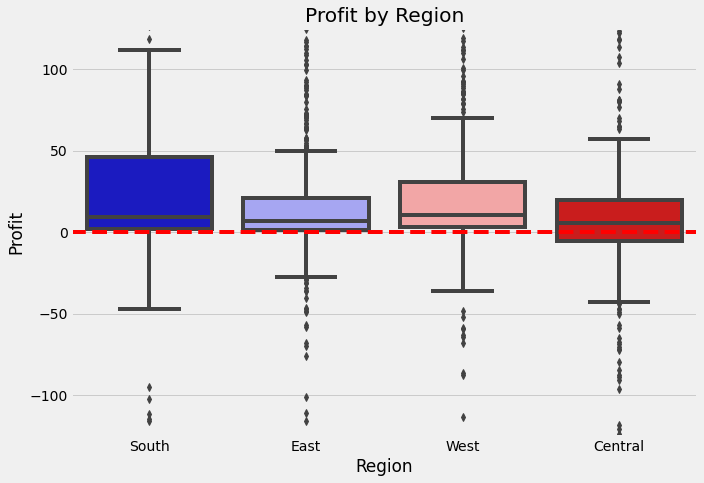

In [93]:
# Plot profit by region
df1 = df.sort_values('profit', ascending=False)
sns.boxplot(x='region_name', y='profit', data=df1, palette='seismic')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Profit by Region')
plt.ylim(-125, 125)
plt.axhline(y=0, linestyle='--', color='red')
plt.show()

In [21]:
# select only the central region
central_region = df.loc[df['region_name'] == 'Central']

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_8198/3700735905.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'${x:,.0f}' for x in ax.get_xticks()])


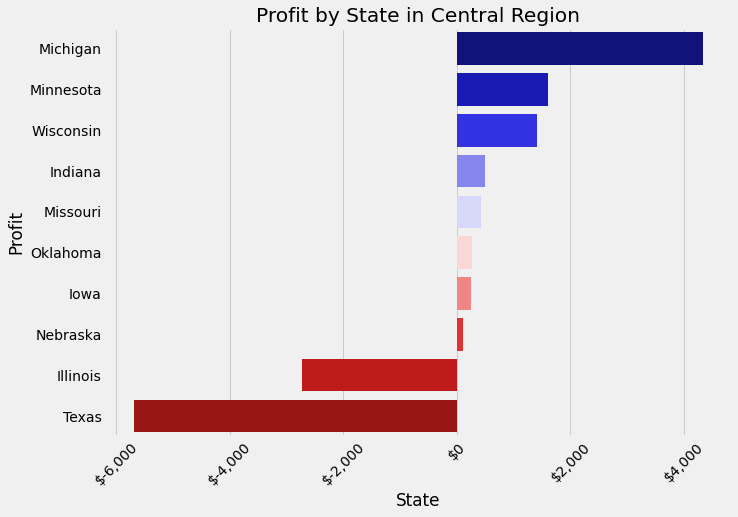

In [86]:

central_states = central_region.groupby('state').sum()['profit'].sort_values(ascending=False)
ax = sns.barplot(central_states, central_states.index, palette='seismic')
ax.set_xticklabels([f'${x:,.0f}' for x in ax.get_xticks()])
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit by State in Central Region')
plt.show()


In [181]:
# within central region, show the mean profit by state
states_sum_profit = central_region.groupby('state').sum()['profit']
# convert states_mean_profit in to a percentage 
print(states_sum_profit.sum())
states_sum_profit / states_sum_profit.sum() * 100

483.3866999999932


state
Illinois     -563.662778
Indiana       103.512260
Iowa           50.995631
Michigan      897.002669
Minnesota     333.601959
Missouri       88.108796
Nebraska       20.343712
Oklahoma       55.445692
Texas       -1177.690491
Wisconsin     292.342549
Name: profit, dtype: float64

In [215]:
texas_cities = central_region.loc[central_region['state'] == 'Texas']
texas_cities_a = texas_cities.loc[texas_cities['profit'] <= 0]

/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_8198/113178372.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${x:,.0f}' for x in ax.get_yticks()])


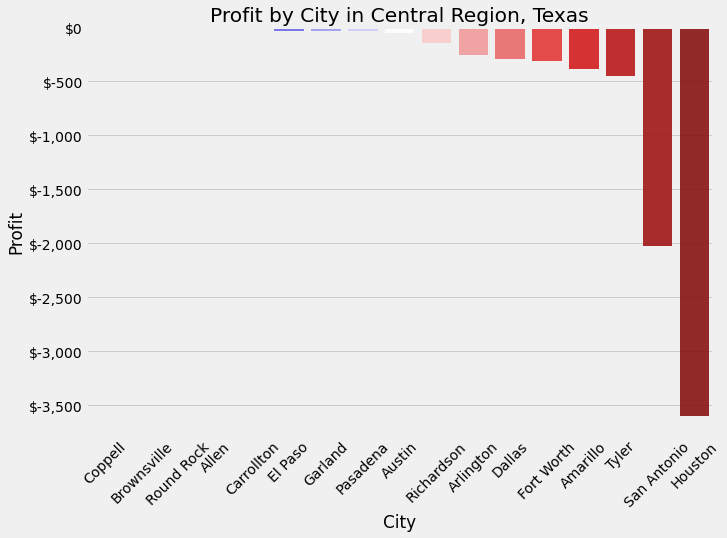

In [216]:
# what are all the orders in san antonio texas
texas_profit = texas_cities_a.groupby('city').sum()['profit'].sort_values(ascending=False)
texas_profit.sort_values(ascending=False).head()
ax = sns.barplot(x=texas_profit.index, y=texas_profit, alpha=0.9, palette='seismic')
ax.set_yticklabels([f'${x:,.0f}' for x in ax.get_yticks()])
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Profit by City in Central Region, Texas')
plt.show()

- H0: Mean of Central region profit = Mean profit of all regions
- Ha: Mean of Central region profit < Mean profit of all regions

In [190]:
# run t-test to determine if there is a significant difference between the mean profit of central region and east region
alpha = .05
region_sample = df[df.region_name == 'Central'].profit
overall_mean = df.profit.mean()
t, p = stats.ttest_1samp(region_sample, overall_mean)
print(t, p/2, alpha)
if p/2 > alpha:
    print('We fail to reject the Null Hypothesis')
elif t > 0:
    print('We fail to reject the Null Hypothesis')
else:
    print('We reject the Null Hypothesis')

-2.4571943813300314 0.007219741708321257 0.05
We reject the Null Hypothesis


- H0: Mean of Texas profit = Mean profit of all Central States
- Ha: Mean of Texas profit < Mean profit of all Central States

In [194]:
alpha = .05
region_sample = central_region[central_region.state == 'Texas'].profit
overall_mean = central_region.profit.mean()
t, p = stats.ttest_1samp(region_sample, overall_mean)
print(t, p/2, alpha)
if p/2 > alpha:
    print('We fail to reject the Null Hypothesis')
elif t > 0:
    print('We fail to reject the Null Hypothesis')
else:
    print('We reject the Null Hypothesis')

-2.326930241404406 0.01058835856308901 0.05
We reject the Null Hypothesis


H0: There is not linear correlation between the Furniture proft and the discounts.
Ha: There is linear correlation between the furniture profit and the discount.

In [226]:
# run pearson r to determine the correlation between profit of furniture and discount of furniture
# select only furniture category
import scipy.stats as stats
furniture = df[df.category == 'Furniture']
t, p = stats.pearsonr(furniture.profit, furniture.discount)
print(t, p)
if p/2 > alpha:
    print('We fail to reject the Null Hypothesis')
elif t > 0:
    print('We fail to reject the Null Hypothesis')
else:
    print('We reject the Null Hypothesis')

-0.5302115642139266 1.7307898709268265e-27
We reject the Null Hypothesis


In [ ]:
def pearson_corr(x, y):
    furniture = df[df.category == 'Furniture']
    r, p = stats.pearsonr(furniture.profit, furniture.discount)
    print(f'Alpha: {alpha}')
    print(f'Pearson r: {r}')
    print(f'P-Value: {p:.5f}')
    if p > alpha:
        print('We fail to reject the Null Hypothesis, therefor there is linear correlation between the furniture profit and the discount.')
    else:
        print('We reject the Null Hypothesis, therefor there is no linear correlation between the furniture profit and the discount.')
    return